In [28]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt

In [29]:
file = r'CrimeByCounty_Clear.csv'
df = pd.read_csv(file)
print df

    Year                  County  Violent_Sum  Property_Sum  Crime_Sum  White  \
0   2016          Alameda County        10127         59744      69871   33.7   
1   2016           Alpine County            6            34         40   70.6   
2   2016           Amador County           92           761        853   80.0   
3   2016            Butte County          790          7307       8097   74.8   
4   2016        Calaveras County          178           656        834   83.2   
5   2016           Colusa County           46           357        403   39.0   
6   2016     Contra Costa County         3895         28939      32834   47.2   
7   2016        Del Norte County          168           608        776   64.2   
8   2016        El Dorado County          389          3042       3431   79.7   
9   2016           Fresno County         5981         31784      37765   32.2   
10  2016            Glenn County          103           559        662   55.1   
11  2016         Humboldt Co

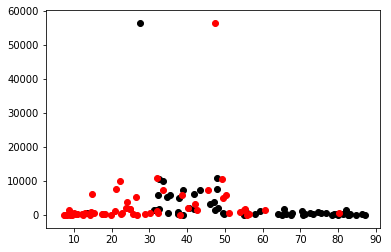

In [32]:
fig = plt.figure()
plt.scatter(df.White, df.Violent_Sum, color = 'k')
plt.scatter(df.Hispanic,df.Violent_Sum,color = 'r' )